# About Yulu
---
Yulu is India's leading micro-mobility service provider, offering shared electric cycles for daily commuting. With a focus on eliminating traffic congestion, Yulu provides convenient and sustainable transportation solutions through its user-friendly mobile app.

Strategically located at key spots like metro stations and residential areas, Yulu aims to make commuting easier and greener for everyone.

# Business Problem
---
Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they
want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

The objective is to assist the stakeholders of Yulu Bikes in comprehending:

1. The key variables that significantly impact the demand for shared electric cycles within the Indian market.

2. The level of effectiveness with which these variables explain the demand for electric cycles.




**Note:**
The categories correspond to different weather conditions:
* Weather 1: Clear, Few clouds, partly cloudy, partly cloudy
*   Weather 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
*   Weather 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
*   Weather 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog



**Note:**
The categories correspond to different weather conditions:



1.   spring
2.   summer
3.   fall
4.   winter



# Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import shapiro, levene
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Structure of Data

In [ ]:
df = pd.read_csv("bike_sharing.txt")

# Check shape of the dataset
print("Shape of the dataset:", df.shape)

# Check the data types of all attributes and convert categorical attributes to 'category'
# Converting season and weather columns to categorical
df['season'] = df['season'].astype('category')
df['weather'] = df['weather'].astype('category')

# Displaying data types after conversion
print("\nData types after conversion:")
print(df.dtypes)

# Statistical summary
print("\nStatistical summary of the dataset:")
print(df.describe())

# Check for missing values
print("\nChecking for missing values:")
print(df.info())


Shape of the dataset: (10886, 12)

Data types after conversion:
datetime        object
season        category
holiday          int64
workingday       int64
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
casual           int64
registered       int64
count            int64
dtype: object

Statistical summary of the dataset:
            holiday    workingday         temp         atemp      humidity  \
count  10886.000000  10886.000000  10886.00000  10886.000000  10886.000000   
mean       0.028569      0.680875     20.23086     23.655084     61.886460   
std        0.166599      0.466159      7.79159      8.474601     19.245033   
min        0.000000      0.000000      0.82000      0.760000      0.000000   
25%        0.000000      0.000000     13.94000     16.665000     47.000000   
50%        0.000000      1.000000     20.50000     24.240000     62.000000   
75%        0.000000      1.000000     26.24000     31.060000   

**Observation:-**

1.Shape of Data:

*   The dataset contains 10,886 rows and 12 columns.

2.Data types after conversion:

*   'datetime' column remains as an object type.
*   'season' and 'weather' columns have been converted to category types.
*   Other columns have retained their original data types: 'int64' and 'float64'.

3.Statistical summary of the dataset:

*   'holiday' and 'workingday' columns are binary variables with values 0 or 1.
*   'temp', 'atemp', 'humidity', and 'windspeed' columns represent continuous variables.
*   'casual', 'registered', and 'count' columns represent counts or frequencies.

4.Checking for missing values:

*   No missing values are found in any of the columns.







# Univariate Analysis


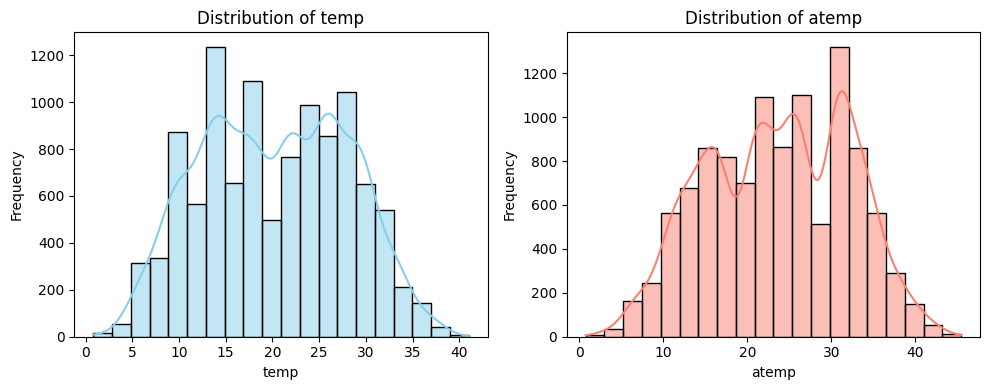

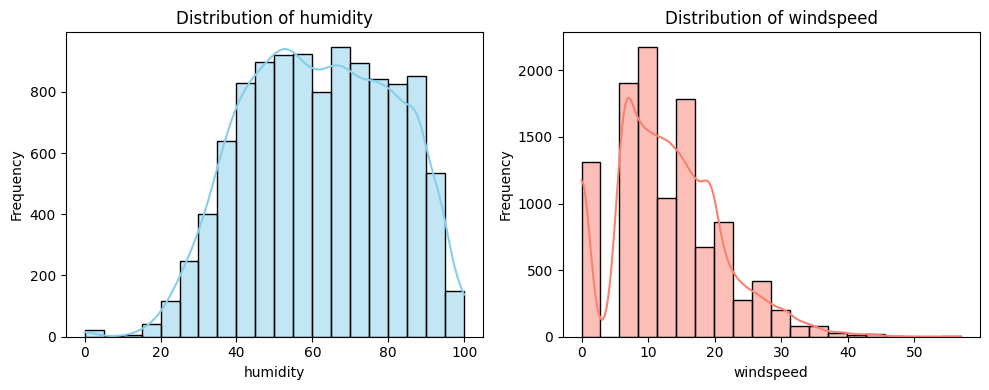

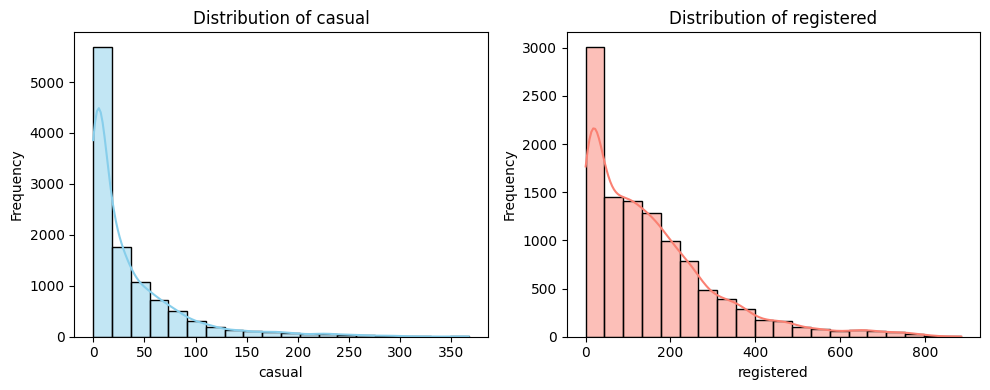

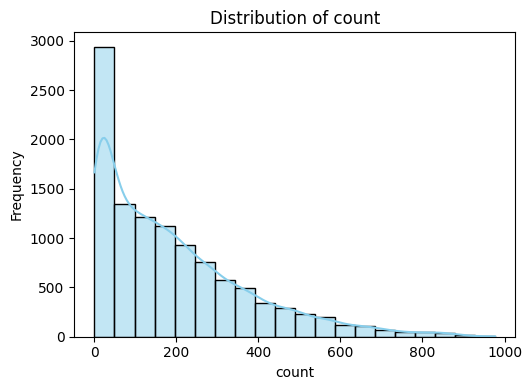

<ipython-input-38-2bbad206840b>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categorical_cols[i], data=df, palette='viridis')
<ipython-input-38-2bbad206840b>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categorical_cols[i+1], data=df, palette='muted')


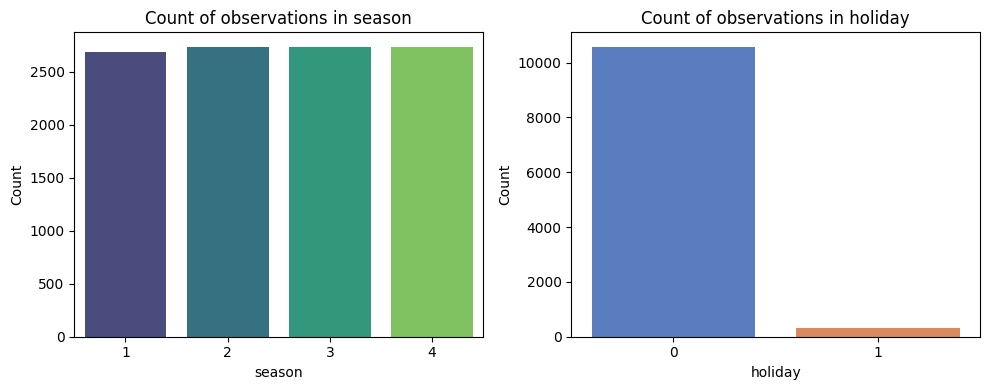

<ipython-input-38-2bbad206840b>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categorical_cols[i], data=df, palette='viridis')
<ipython-input-38-2bbad206840b>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categorical_cols[i+1], data=df, palette='muted')


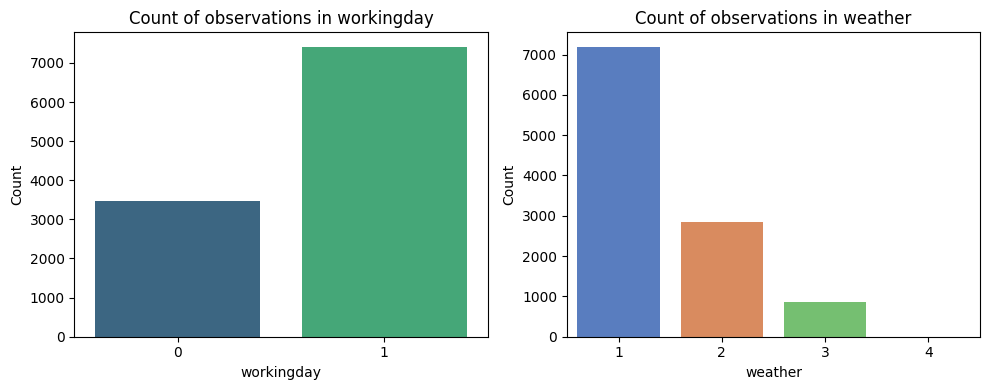

In [ ]:
# Define the continuous and categorical columns
continuous_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
categorical_cols = ['season', 'holiday', 'workingday', 'weather']

# Univariate analysis for continuous variables
for i in range(0, len(continuous_cols), 2):
    plt.figure(figsize=(10, 4))

    # Plot first histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[continuous_cols[i]], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {continuous_cols[i]}')
    plt.xlabel(continuous_cols[i])
    plt.ylabel('Frequency')

    # Plot second histogram if available
    if i+1 < len(continuous_cols):
        plt.subplot(1, 2, 2)
        sns.histplot(df[continuous_cols[i+1]], kde=True, bins=20, color='salmon')
        plt.title(f'Distribution of {continuous_cols[i+1]}')
        plt.xlabel(continuous_cols[i+1])
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Univariate analysis for categorical variables
for i in range(0, len(categorical_cols), 2):
    plt.figure(figsize=(10, 4))

    # Plot first count plot
    plt.subplot(1, 2, 1)
    sns.countplot(x=categorical_cols[i], data=df, palette='viridis')
    plt.title(f'Count of observations in {categorical_cols[i]}')
    plt.xlabel(categorical_cols[i])
    plt.ylabel('Count')

    # Plot second count plot if available
    if i+1 < len(categorical_cols):
        plt.subplot(1, 2, 2)
        sns.countplot(x=categorical_cols[i+1], data=df, palette='muted')
        plt.title(f'Count of observations in {categorical_cols[i+1]}')
        plt.xlabel(categorical_cols[i+1])
        plt.ylabel('Count')

    plt.tight_layout()
    plt.show()


## Observations and Conclusions for Continuous Variables:-

**1.   temp vs Frequency:-**
*   The distribution of temperature is most likely centered around 20 degrees Celsius.
*   There are fewer temperatures recorded below 10 degrees Celsius compared to temperatures above 30 degrees Celsius. This suggests the data may be from a location with a moderate climate.

**2.   atemp vs Frequency:-**
*   The frequency distribution of “atemp” appears to be bimodal, indicating the presence of two distinct groups within the data. One peak occurs around the 20-30 range, while the other peak is at a higher value.
*   The highest frequency occurs in the 20-30 range, suggesting that this temperature range is more common in the dataset.

**3.   Humidity vs Frequency:-**
*   The majority of instances fall within the 60-80% humidity range. This could indicate that these levels are typical or “normal” for the observed area or time period.

**4.   Windspeed vs Frequency:-**
*   Wind speeds around 10 and 20 are more common, as indicated by their higher frequencies.
*   The distribution is not uniform; there’s a significant drop in frequency as wind speed increases beyond 20.

**5.   Casual vs frequency:-**
*   The frequency is highest between 0 and 50, the majority of data points for “casual” fall within this range.
*   As the value of “casual” increases, the frequency sharply decreases.

**6.   Registered vs frequency:-**
*   The majority of data points for “registered” fall within the lower range (0 to 200).
*   Higher values of “registered” are less frequent in this dataset.
*   The right-skewed distribution suggests that most instances have relatively low “registered” counts, with only a few outliers having significantly higher counts.

**7.   Count vs frequency:-**
*   There is a sharp peak around 0-200 counts, after which the frequency decreases significantly.
*   This distribution appears to be right-skewed, indicating that there are many occurrences with low counts and fewer occurrences with high counts.

## Observations and Conclusions for Categorical Variables:-

**1.   Season vs Count:-**
*   There is a relatively uniform distribution of observations across all four seasons.
*   This indicates that the data collection or event occurrence is consistent throughout the year.

**2.   Holidays vs count:-**

*   The non-holiday period has significantly more observations compared to the holiday period.
*   The non-holiday count exceeds 10,000 observations, while the holiday count is less than 2,000.
*   Count of bikes appears to be less active or prevalent during holiday times.

**3.   Working day vs count:-**

*   The non-working day period has significantly fewer observations compared to the working day period.
*   The non-working day count is around 3000, while the working day count exceeds 6000.
*   The class distribution between working days and non-working days is imbalanced, with a much larger number of count of bikes rented during working days.

**4.   Weather vs count:-**

*   The majority of the count are associated with weather category 1, indicating that this type of weather is the most common or frequently recorded in the dataset.
*   There is a significant drop in the number of observations from weather category 1 to weather categories 2 and 3.
*   Weather category 4 has no recorded observations, suggesting that bike renting is not preferred in this type of weather condition.

# Bivariate Analysis

## Bivariate Analysis for continous variables

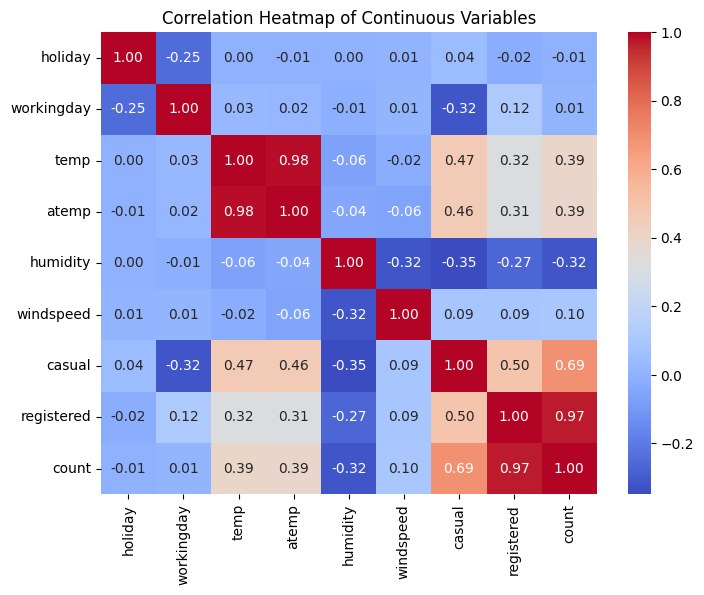

In [ ]:
# Select only continuous variables
continuous_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation matrix for continuous variables
corr_matrix = df[continuous_cols].corr()

# Generate a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()


**Observation:**

*   There is a strong positive correlation between temperature (temp) and feeling temperature (atemp), with a coefficient of 0.98.


*   The count of total rental bikes (count) is highly positively correlated with the number of registered users (registered), showing a coefficient of 0.97. This implies that an increase in registered users could lead to more bike rentals.

*   Windspeed has a low or negligible correlation with most other variables. In other words, windspeed does not significantly impact bike rental counts.

**Conclusion:**

*   As the actual temperature increases, the feeling temperature also tends to increase.

*   An increase in registered users could lead to more bike rentals. Therefore, strategies to increase bike rentals should focus on factors other than windspeed.

## Bivariate analysis for categorical variables

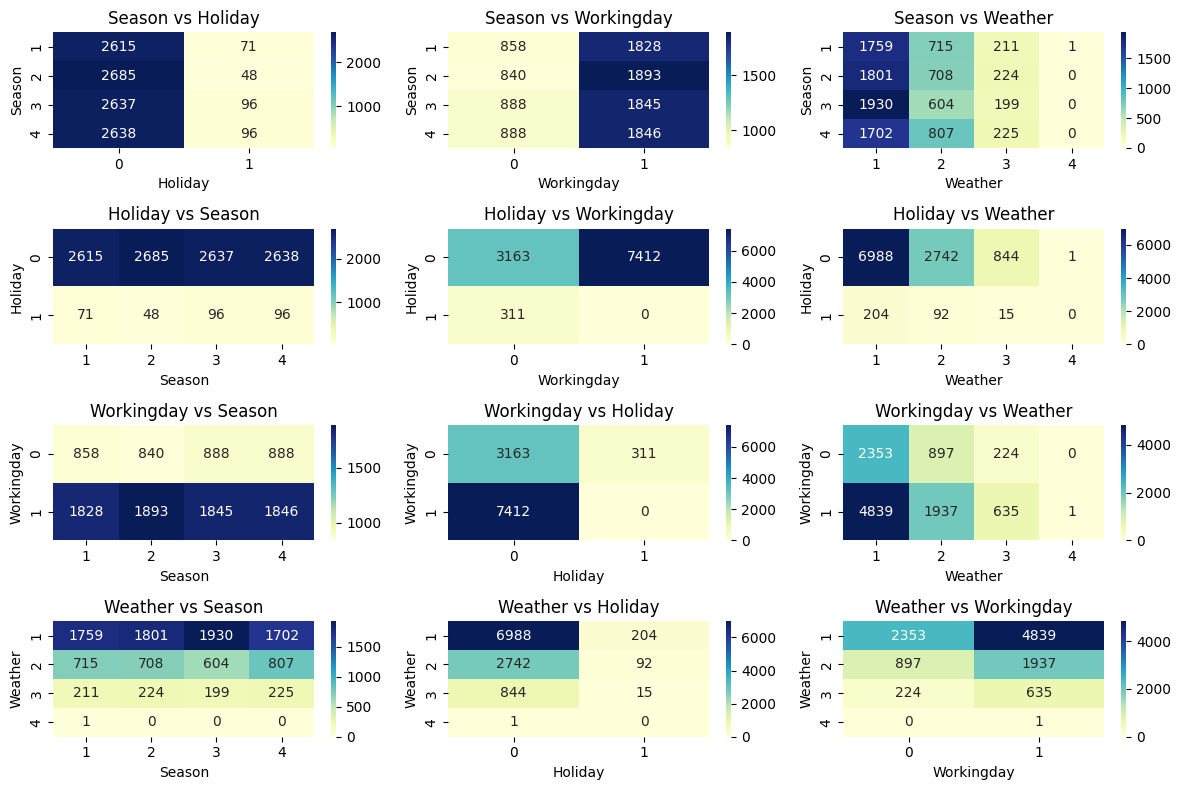

In [ ]:
categorical_cols = ['season', 'holiday', 'workingday', 'weather']

# Create a cross-tabulation of each pair of categorical variables
cross_tabulations = {}
for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 != col2:
            cross_tabulations[(col1, col2)] = pd.crosstab(df[col1], df[col2])

# Calculate no. of rows and cols for subplots
num_cross_tabulations = len(cross_tabulations)
num_rows = (num_cross_tabulations - 1) // 3 + 1  # 3 columns per row
num_cols = min(num_cross_tabulations, 3)

# plot layout
plt.figure(figsize=(12, 8))

# Loop through each pair of categorical cols
for i, (cols, crosstab) in enumerate(cross_tabulations.items(), 1):
    plt.subplot(num_rows, num_cols, i)
    sns.heatmap(crosstab, annot=True, cmap="YlGnBu", fmt='d')
    plt.title(f'{cols[0].capitalize()} vs {cols[1].capitalize()}')
    plt.xlabel(cols[1].capitalize())
    plt.ylabel(cols[0].capitalize())

# Adjusting the layout
plt.tight_layout()
plt.show()


**1.Observation and conclusion for Season:-**

*   *Season vs Holiday:* Holidays are relatively infrequent compared to regular days.
*   *Season vs Workingday:* Workdays dominate regardless of the season.
*   *Season vs Weather:* Weather type 1 prevails across all seasons.

**2.Observation and conclusion for Holiday:-**

*   *Holiday vs Season:* Holidays are evenly distributed across seasons.
*   *Holiday vs Workingday:* They predominantly occur on non-working days.
*   *Holiday vs Weather:* condition 1 correlate with more holidays.

**3.Observation and conclusion for Workingday:-**

*   *Workingday vs Season:* People tend to work consistently across seasons.
*   *Workingday vs Holiday:* Holidays significantly impact the number of working days.
*   *Workingday vs Weather:* Weather conditions influence the availability of working days.

**4.Observation and conclusion for Weather:-**

*   *Weather vs Season:* Weather condition 1 is the most common and Weather condition 4 is extremely rare across all categories.
*   *Weather vs Holiday:* Weather type 1 is highly prevalent on non-holidays, followed by type 2.
*   *Weather vs Workingday:* On working days, there’s a significant number of occurrences of weather type 1.

#  T-Test to check if Working Day has an effect on the cycles rented

## Visual Analysis

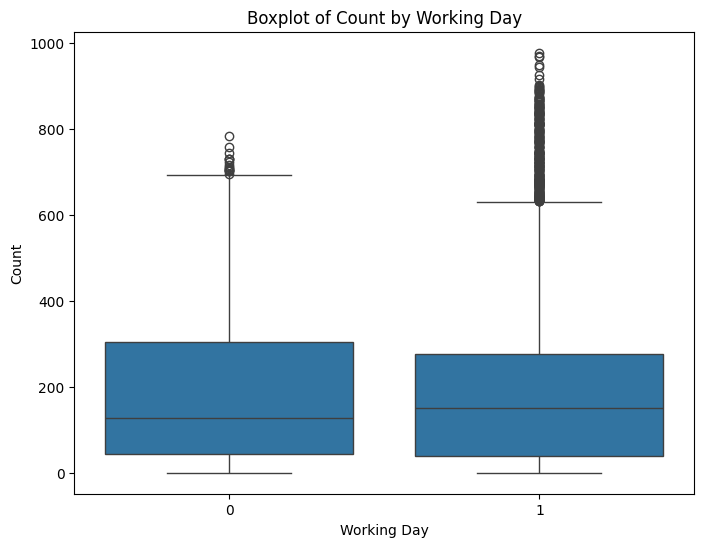

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='workingday', y='count', data=df)
plt.title('Boxplot of Count by Working Day')
plt.xlabel('Working Day')
plt.ylabel('Count')
plt.show()

Observation:


*   Higher count on working days (1) compared to non-working days (0).

*   Larger interquartile range (IQR) on working days, indicating greater variability in the count.
*   More outliers present on working days.

Conclusion:


*   There are more counts on working days than on non-working days.
*   The count on working days is more variable on working days than on non-working days.



## Formulating Hypothesis

* Null Hypothesis (H0): There is no difference in the number of electric cycles rented between working and non-working days.
* Alternate Hypothesis (H1): There is a difference in the number of electric cycles rented between working and non-working days.

**Reason for Selecting T-Test:-**

Since we are comparing the means of two independent groups (working day and non-working day),the appropriate test to use is the independent t-test (two-sample t-test).

## Test Assumptions



1.   Independence: The observations are independent.

1.   Normally distributed populations: The populations from which the samples are drawn should be normally distributed.
2.   Homogeneity of variances: The variances of the two groups should be equal.


### Checking Test Assumptions (statistical method)

In [ ]:
# Subset of data for working days
workingday_yes = df[df['workingday'] == 1]['count']

# Subset of data for non-working days
workingday_no = df[df['workingday'] == 0]['count']

# Assumption 2: Normally distributed populations
# Shapiro-Wilk test for normality

#Null Hypothesis (H0): The data in each group (working days and non-working days) are normally distributed in the population.

stat_wd, p_wd = shapiro(workingday_yes)
stat_nwd, p_nwd = shapiro(workingday_no)

print(f"Shapiro-Wilk test for normality - Working Day: p-value = {p_wd}")
print(f"Shapiro-Wilk test for normality - Non-Working Day: p-value = {p_nwd}")

# Conclusion for normality test
alpha = 0.05
if p_wd > alpha and p_nwd > alpha:
    print("Both groups follow a normal distribution (Fail to reject the null hypothesis)")
else:
    print("At least one group does not follow a normal distribution (Reject the null hypothesis)")

# Assumption 3: Homogeneity of variances
# Levene's test for homogeneity of variances

#Null Hypothesis (H0): The variances of the two groups (working days and non-working days) are equal in the population.

stat, p = levene(workingday_yes, workingday_no)

print(f"Levene's test for homogeneity of variances: p-value = {p}")

# Conclusion for homogeneity of variances test
if p > alpha:
    print("The variances of the two groups are equal (Fail to reject the null hypothesis)")
else:
    print("The variances of the two groups are not equal (Reject the null hypothesis)")


Shapiro-Wilk test for normality - Working Day: p-value = 0.0
Shapiro-Wilk test for normality - Non-Working Day: p-value = 4.203895392974451e-45
At least one group does not follow a normal distribution (Reject the null hypothesis)
Levene's test for homogeneity of variances: p-value = 0.9437823280916695
The variances of the two groups are equal (Fail to reject the null hypothesis)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**Observation:**

1.Shapiro-Wilk Test for Normality:
*   Both p-values are significantly less than the chosen significance level of 0.05.
*   We reject the null hypothesis that both groups follow a normal distribution. At least one group does not follow a normal distribution.

2.Levene's Test for Homogeneity of Variances:
*   The p-value for Levene's test is approximately 0.944, which is greater than significance level.
*   We fail to reject the null hypothesis that the variances of the two groups are equal.


### Checking Test Assumptions (visual analysis)

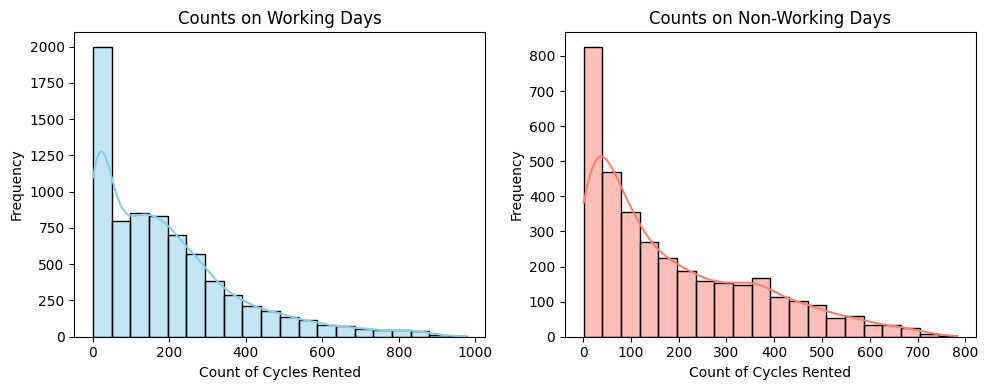

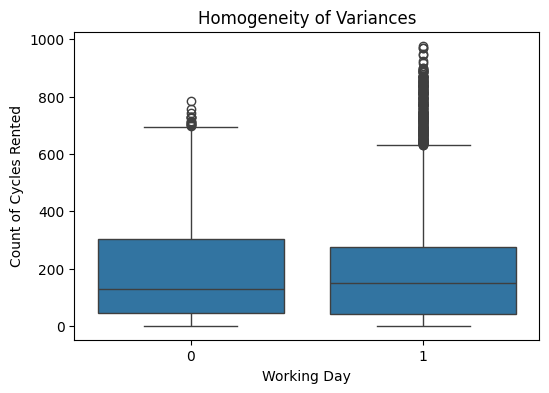

In [ ]:
# Visualizing distribution of counts
plt.figure(figsize=(10, 4))

# Histogram for counts on working days
plt.subplot(1, 2, 1)
sns.histplot(df[df['workingday'] == 1]['count'], bins=20, kde=True, color='skyblue')
plt.title('Counts on Working Days')
plt.xlabel('Count of Cycles Rented')
plt.ylabel('Frequency')

# Histogram for counts on non-working days
plt.subplot(1, 2, 2)
sns.histplot(df[df['workingday'] == 0]['count'], bins=20, kde=True, color='salmon')
plt.title('Counts on Non-Working Days')
plt.xlabel('Count of Cycles Rented')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Visualizing homogeneity of variances using box plots
plt.figure(figsize=(6, 4))
sns.boxplot(x='workingday', y='count', data=df)
plt.title('Homogeneity of Variances')
plt.xlabel('Working Day')
plt.ylabel('Count of Cycles Rented')

plt.show()


**Observation:**

1.Visual Analysis for Normality:-

*   Both working days histogram & the non-working days histogram exhibits positive skewness.
*   for **Count on Working Days**:- 'Count of Cycles Rented' ranges from 0 to 1000 & 'Frequency' ranges from 0 to 2000.
*   for **Count on Non-Working Days**:- 'Count of Cycles Rented' ranges from 0 to 800 & 'Frequency' also ranges from 0 to 800.

Therefore, we reject the null hypothesis that the data in each group follows a normal distribution in the population.


2.Visual Analysis for Homogeneity:-

*   The spread and range of data appear similar for both working days and non-working days.
*   The medians are approximately at the same level for both groups.
*   Outliers are present in both categories, but they do not significantly affect the overall pattern.

Therefore, we fail to reject the null hypothesis. The variances of the two groups (working days and non-working days) appear to be similar.










## Finding p-value and conclusion

In [ ]:
# Finding p-value
workingday_yes = df[df['workingday'] == 1]['count']
workingday_no = df[df['workingday'] == 0]['count']
t_stat, p_value = ttest_ind(workingday_yes, workingday_no)

print(f"P-value: {p_value}")

# Conclusion based on the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the number of electric cycles rented between working and non-working days.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the number of electric cycles rented between working and non-working days.")


P-value: 0.22644804226361348
Fail to reject the null hypothesis. There is no significant difference in the number of electric cycles rented between working and non-working days.


**Observation:**

*   The obtained p-value from the independent samples t-test is approximately 0.226 which is greater than alpha.

**Conclusion:**

*   At a significance level of 0.05, we fail to reject the null hypothesis.

*   The day of the week, whether it's a working day or not, does not substantially impact the demand for electric cycles.






# ANOVA to check if No. of cycles rented is similar or different in different Weather

## Visual Analysis

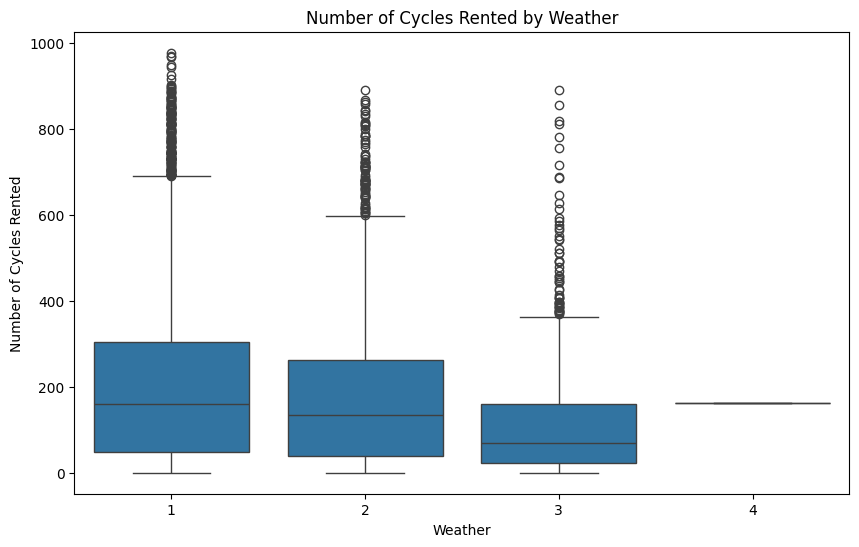

In [ ]:
# Visual analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather', y='count', data=df)
plt.title('Number of Cycles Rented by Weather')
plt.xlabel('Weather')
plt.ylabel('Number of Cycles Rented')
plt.show()

**Observations:**

*   The median number of cycles rented is highest for weather 1.
*   There is more variability in the number of cycles rented on weather 1 as indicated by the larger interquartile range (IQR) compared to weather 2 and weather 3.
*   There are outliers present for all three weather conditions.

**Conclusions:**

*   Weather conditions likely influence the number of cycles rented, with weather1 seeing the highest overall rentals.

*   Weather 1 also experiences greater variability in rental numbers compared to weather 2 and weather 3.


## Formulating Hypothesis

*   Null Hypothesis (H0): The mean number of cycles rented is the same across different weather conditions.
*   Alternative Hypothesis (H1): The mean number of cycles rented is different across different weather conditions.

**Reason for selecting ANOVA test:-**

ANOVA (Analysis of Variance) is the appropriate test for comparing means across multiple groups.

## Test Assumptions


1.   normality of residuals
2.   Homogeneity of variance
3.   Independence of observations
4.   Interval or ratio data

### Checking Test Assumptions (statistical method)

*   List item
*   List item



In [ ]:
# Fit ANOVA model
model = ols('count ~ workingday', data=df).fit()
# Get residuals
anova_residuals = model.resid

# Assumption 1: Normality of residuals
# Shapiro-Wilk test for normality of residuals

#Null Hypothesis (H0): The residuals (errors) are normally distributed.

stat, p = shapiro(anova_residuals)
print(f"Shapiro-Wilk test for normality of residuals: p-value = {p}")

# Conclusion for normality test
alpha = 0.05
if p > alpha:
    print("Residuals are normally distributed (Fail to reject the null hypothesis)")
else:
    print("Residuals are not normally distributed (Reject the null hypothesis)")

# Assumption 2: Homogeneity of variance
# Levene's test for homogeneity of variances

#Null Hypothesis (H0): The variances of the groups are equal.

stat, p = levene(workingday_yes, workingday_no)

print(f"Levene's test for homogeneity of variances: p-value = {p}")

# Conclusion for homogeneity of variances test
if p > alpha:
    print("The variances of the groups are equal (Fail to reject the null hypothesis)")
else:
    print("The variances of the groups are not equal (Reject the null hypothesis)")


Shapiro-Wilk test for normality of residuals: p-value = 0.0
Residuals are not normally distributed (Reject the null hypothesis)
Levene's test for homogeneity of variances: p-value = 0.9437823280916695
The variances of the groups are equal (Fail to reject the null hypothesis)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**Observation:**

1.Normality Test (Shapiro-Wilk Test for Normality of Residuals):
*   The p-value obtained from the Shapiro-Wilk test is 0.0, which is less than the significance level of 0.05.
*   Therefore, we reject the null hypothesis (H0) that the residuals are normally distributed.

2.Homogeneity of Variances Test (Levene's Test for Homogeneity of Variances):



*   The p-value obtained from Levene's test is 0.9438, which is greater than the significance level of 0.05.
*   Thus, we fail to reject the null hypothesis (H0) that the variances of the groups are equal.





### Checking Test Assumptions (Visual Analysis)

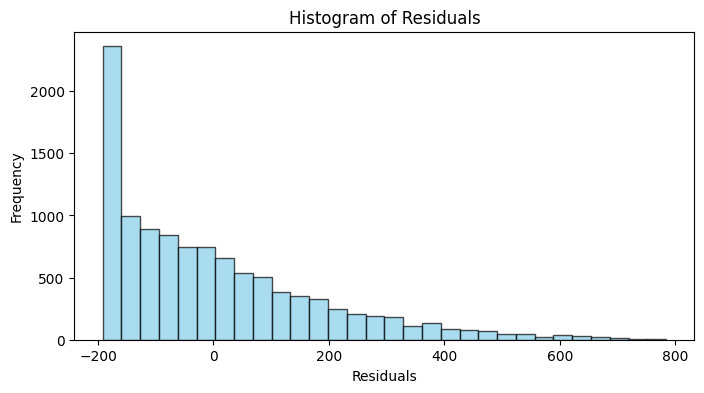

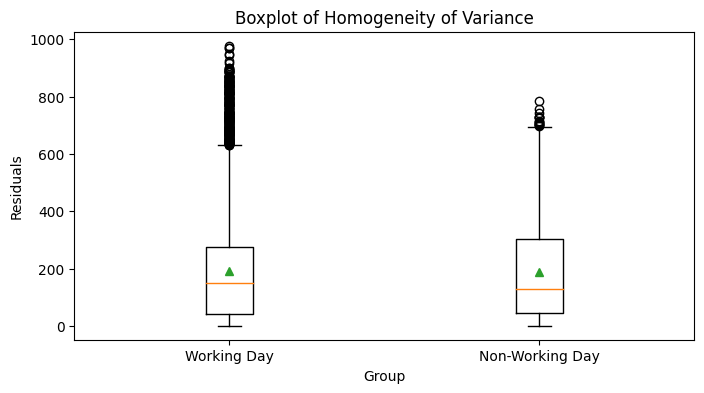

In [ ]:
# Visual Analysis for Normality of Residuals
plt.figure(figsize=(8, 4))
plt.hist(anova_residuals, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Visual Analysis for Homogeneity of Variances
plt.figure(figsize=(8, 4))
plt.boxplot([workingday_yes, workingday_no], labels=['Working Day', 'Non-Working Day'], showmeans=True)
plt.title('Boxplot of Homogeneity of Variance')
plt.xlabel('Group')
plt.ylabel('Residuals')
plt.show()


**Observation:**

1.Visual Analysis for Normality of Residuals:-

*   The distribution of residuals is not symmetric; it is skewed to the left.
*   As residuals increase, the frequency decreases gradually.

Therefore, we reject the null hypothesis that the residuals follow a normal distribution.


2.Visual Analysis for Homogeneity of Variances:-


*   The spread of residuals appears similar for both working days and non-working days.
*   The medians are approximately at the same level for both groups.
*   Outliers do not significantly affect the overall pattern.

Therefore, we fail to reject the null hypothesis. The variances of residuals for both working and non-working days appear to be similar.





## Finding p-value and conclusion


In [ ]:
# Finding p-value
weather_groups = [df[df['weather'] == i]['count'] for i in df['weather'].unique()]
f_stat, p_value = f_oneway(*weather_groups)

print(f"P-value: {p_value}")

# Conclusion based on the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the number of cycles rented across different weather conditions.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the number of cycles rented across different weather conditions.")


P-value: 5.482069475935669e-42
Reject the null hypothesis. There is a significant difference in the number of cycles rented across different weather conditions.


**Observation:**
*   The p-value obtained from the ANOVA test comparing the number of cycles rented across different weather conditions is approximately 5.48e-42.
*   The p-value is significantly less than the chosen significance level of 0.05.

**Conclusion:**

*   With a significance level of 0.05, we reject the null hypothesis.
*   There is a significant difference in the number of cycles rented across different weather conditions.

*   Weather conditions have a notable impact on the demand for cycles, influencing rental patterns.

# ANOVA to check if No. of cycles rented is similar or different in different Seasons

## Visual Analysis

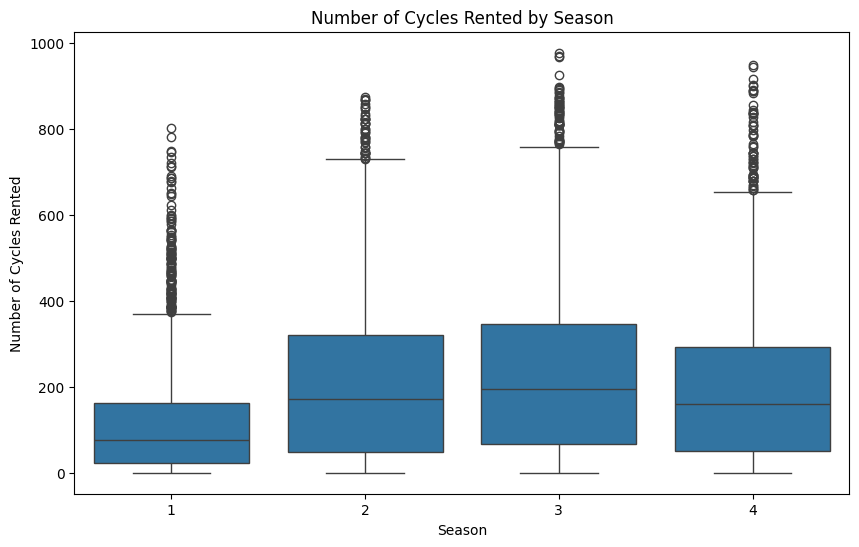

In [ ]:
# Visual analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='count', data=df)
plt.title('Number of Cycles Rented by Season')
plt.xlabel('Season')
plt.ylabel('Number of Cycles Rented')
plt.show()

Observation:


*   Bicycle rentals are highest in season 3 and lowest in season 2. There is a clear seasonal trend in bicycle rentals.
*   The spread of data points is larger in season 1 and season 3 compared to season 2 and season 4. This suggests greater variability in bicycle rentals during specific seasons.

Conclusion:


*   Bicycle rentals are most frequent in season 3.
*   There is more variation in the number of bicycle rentals during season 3.

## Formulating Hypothesis

*   Null Hypothesis (H0): The mean number of cycles rented is the same across different seasons.
*   Alternative Hypothesis (H1): The mean number of cycles rented is different across different seasons.

**Reason for selecting ANOVA test:-**

ANOVA (Analysis of Variance) is the appropriate test for comparing means across multiple groups.

## Test Assumptions

1.   normality of residuals
2.   Homogeneity of variance
3.   Independence of observations
4.   Interval or ratio data



### checking Test Assumption (statistical method)

In [ ]:
# Fit ANOVA model
model_season = ols('count ~ season', data=df).fit()

# Get residuals
anova_residuals_season = model_season.resid

# Test assumptions

# 1. Normality of residuals
# Shapiro-Wilk test for normality of residuals

#Null Hypothesis (H0): The residuals (errors) are normally distributed.

stat_normality, p_normality = shapiro(anova_residuals_season)
print(f"Shapiro-Wilk test for normality of residuals: p-value = {p_normality}")

# Conclusion for normality test
alpha = 0.05
if p_normality > alpha:
    print("Residuals are normally distributed (Fail to reject the null hypothesis)")
else:
    print("Residuals are not normally distributed (Reject the null hypothesis)")

# 2. Homogeneity of variance
# Levene's test for homogeneity of variances

#Null Hypothesis (H0): The variances of the groups are equal.

stat_homogeneity, p_homogeneity = levene(df[df['season'] == 1]['count'],
                                          df[df['season'] == 2]['count'],
                                          df[df['season'] == 3]['count'],
                                          df[df['season'] == 4]['count'])
print(f"Levene's test for homogeneity of variances: p-value = {p_homogeneity}")

# Conclusion for homogeneity of variances test
if p_homogeneity > alpha:
    print("The variances of the groups are equal (Fail to reject the null hypothesis)")
else:
    print("The variances of the groups are not equal (Reject the null hypothesis)")


Shapiro-Wilk test for normality of residuals: p-value = 0.0
Residuals are not normally distributed (Reject the null hypothesis)
Levene's test for homogeneity of variances: p-value = 1.0147116860043298e-118
The variances of the groups are not equal (Reject the null hypothesis)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**Observation:**

1.Normality of Residuals Test:
*   Shapiro-Wilk test for normality of residuals resulted in a p-value of 0.0, indicating that the residuals are not normally distributed.
*   Since the p-value is less than the significance level of 0.05, we reject the null hypothesis.

2.Homogeneity of Variances Test:
*   Levene's test for homogeneity of variances yielded a very low p-value (approximately 0), indicating that the variances of the groups are not equal.
*   As the p-value is less than the significance level of 0.05, we reject the null hypothesis.

### checking Test Assumption (Visual Analysis)

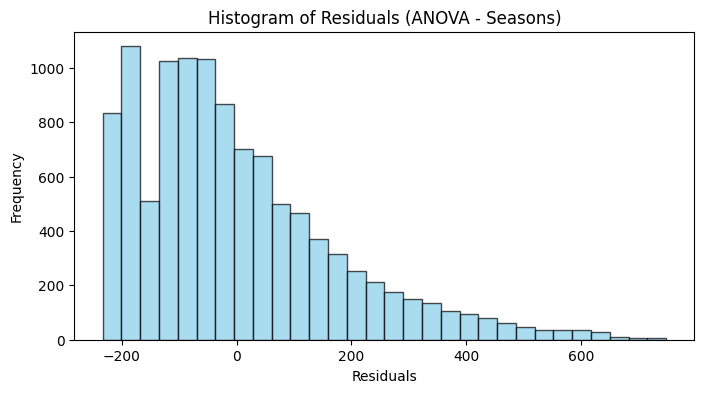

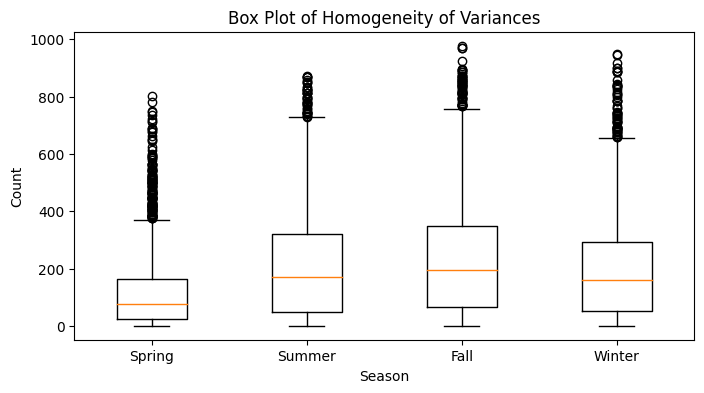

In [ ]:
# Visual Analysis for Normality of Residuals
plt.figure(figsize=(8, 4))
plt.hist(anova_residuals_season, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Residuals (ANOVA - Seasons)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Visual Analysis for Homogeneity of Variances
plt.figure(figsize=(8, 4))
plt.boxplot([df[df['season'] == i]['count'] for i in range(1, 5)], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.title('Box Plot of Homogeneity of Variances')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()


**Observation:**

1.Visual Analysis for Normality of Residuals:-

*   The spread of residuals is not perfectly symmetric; there is a slight skew to the right.
*   Most of the residuals cluster around 0, but there are some positive residuals extending further to the right.

Therefore, we fail to reject the null hypothesis. residuals are normally distributed.

2.Visual Analysis for Homogeneity of Variances:-

*   The spread of residuals appears consistent across all four seasons.
*   The medians are approximately at the same level for Spring, Summer, Fall, and Winter.
*   Outliers do not significantly affect the overall pattern.

Therefore, we fail to reject the null hypothesis.


## Finding p-value and conclusion


In [ ]:
# Finding p-value
season_groups = [df[df['season'] == i]['count'] for i in df['season'].unique()]
f_stat, p_value = f_oneway(*season_groups)

print(f"P-value: {p_value}")

# Conclusion based on p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the number of cycles rented across different seasons.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the number of cycles rented across different seasons.")


P-value: 6.164843386499654e-149
Reject the null hypothesis. There is a significant difference in the number of cycles rented across different seasons.


**observation:**

*   The p-value obtained from the ANOVA test comparing the number of cycles rented across different seasons is approximately 6.16e-149.
*   The p-value is significantly less than the chosen significance level of 0.05.

**Conclusion:**

*   With a significance level of 0.05, we reject the null hypothesis.
*   There is a significant difference in the number of cycles rented across different seasons.
*   Seasons have a notable impact on the demand for cycles, influencing rental patterns.

# Chi-square test to check if Weather is dependent on the season

## Visual Analysis

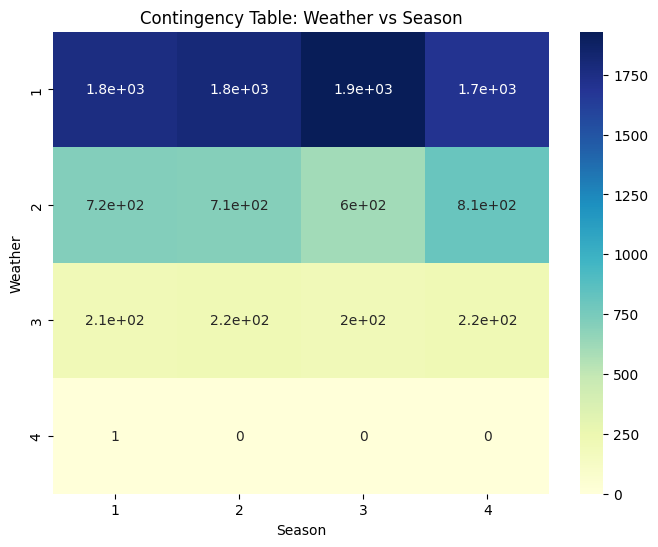

In [ ]:
# Creating a contingency table
contingency_table = pd.crosstab(df['weather'], df['season'])

# Plotting contingency table
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu")
plt.title('Contingency Table: Weather vs Season')
plt.xlabel('Season')
plt.ylabel('Weather')
plt.show()

**Observation:**

*   There is a clear seasonal pattern in the frequency of weather changes.
*   Season 2 has the highest frequency of weather changes, while Season 1 and Season 4 have lower frequencies.
*   Season 3 has the lowest frequency of weather changes.

**Conclusion:**

*   The frequency of weather changes is highest in Season 2 and lowest in summer Season 3.

## Formulating Hypothesis

*   Null Hypothesis (H0): Weather and season are independent of each other.
*   Alternative Hypothesis (H1): Weather and season are dependent on each other.

**Reason for selecting Chi-square test:-**

Chi-square test is the appropriate test for checking the independence between two categorical variables.

## Test Assumptions

The assumptions of the chi-square test include:
*   The data should be frequency data (i.e., each cell should have a frequency count).
*   The expected frequency count for each cell should be at least 5.

### checking test assumption (statistical method)

In [ ]:
# Check assumptions for Chi-square test

# Assumption 1: Frequency data
# Ensure that each cell in the contingency table has a frequency count
# If your data is not in frequency format, convert it using pd.crosstab()

# Calculate expected frequencies for each cell in the contingency table
observed_freq = pd.crosstab(df['season'], df['weather'])
chi2_stat, p_value, dof, expected_freq = chi2_contingency(observed_freq)

# Check if any expected frequency count is less than 5
min_expected_freq = expected_freq.min()
if min_expected_freq < 5:
    print(f"At least one expected frequency count ({min_expected_freq}) is less than 5.")
else:
    print("Expected frequency counts for all cells are at least 5.")


At least one expected frequency count (0.24673893073672606) is less than 5.


**Observation:**

1.Frequency Data:
*   The data is presented in frequency format, as each cell in the contingency table represents a frequency count. Therefore, this assumption is met.

2.Expected Frequency Counts:
*   The calculation of expected frequencies for each cell in the contingency table indicated that at least one expected frequency count is less than 5.
*   This implies that the assumption of having expected frequency counts of at least 5 for each cell is violated.


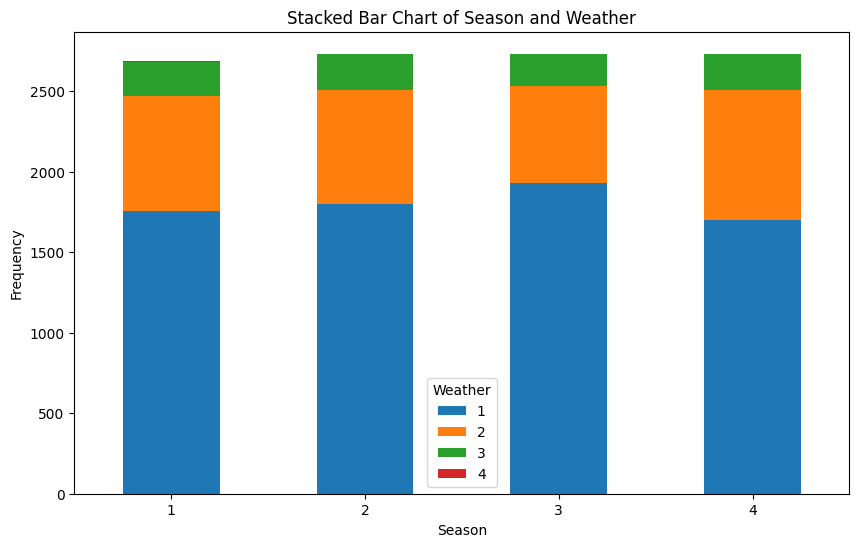

In [ ]:
# Create a cross-tabulation of season and weather
cross_tab = pd.crosstab(df['season'], df['weather'])

# Plot stacked bar chart
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Chart of Season and Weather')
plt.xlabel('Season')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Weather')
plt.show()

**Observation:**

1.Frequency Data:

*   Each segment of the stacked bar chart corresponds to a specific weather condition, and the height of each segment represents the frequency count.

Therefore, the first assumption is met.

2.Expected Frequency Counts:-


*   Since all weather conditions are not represented with values, all the remaining cells must have a value of 0.

Therefore, the assumption that the expected frequency count for each cell should be at least 5 is not met.





## Finding p-value and conclusion

In [ ]:
# Finding p-value
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"P-value: {p_value}")

# Conclusion based on the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. Weather is dependent on the season.")
else:
    print("Fail to reject the null hypothesis. Weather is independent of the season.")

P-value: 1.5499250736864862e-07
Reject the null hypothesis. Weather is dependent on the season.


**Observation:**

*   The p-value obtained from the chi-square test to assess the dependence of weather on the season is approximately 1.55e-07.
*   The p-value is significantly less than the chosen significance level of 0.05.

**Conclusion:**

*   With a significance level of 0.05, we reject the null hypothesis.
*   There is a significant association between weather and season.
*   Weather and season are not independent of each other; their occurrences are dependent.



---



#Significant Variables Predicting Demand for shared electric cycles in the Indian market

### 1.Temperature:
*   Both actual temperature (temp) and feeling temperature (atemp) are significant predictors of demand.
*   As temperature increases, the demand for shared electric cycles tends to rise.
*   Yulu should leverage this by offering targeted promotions during hotter months or adjusting pricing strategies based on seasonal temperature variations.

### 2.Registered Users:
*   The number of registered users (registered) significantly influences demand, with a strong positive correlation between registered users and bike rentals.
*   Strategies aimed at increasing the number of registered users, such as loyalty programs or referral incentives, could lead to higher bike rental counts.

### 3.Seasonality:
*   Seasonality plays a crucial role in demand fluctuations.
*   Yulu should tailor marketing campaigns and operational strategies based on seasonal patterns to capitalize on peak demand periods.

### 4.Weather Conditions:



*   Weather conditions also impact bike rental demand, with weather category 1 being the most common and preferred.
*   Yulu should monitor weather forecasts and adjust operations accordingly, such as providing incentives during unfavorable weather to maintain demand stability.


---

# Recommendations

### 1.Expansion and Adaptation:
*   Consider expanding operations to regions with favorable weather conditions or high demand during specific seasons to maximize overall revenue.

### 2.Partnerships:
*   Explore partnerships with local businesses or events to promote bike rentals during holidays or special occasions.

### 3. Seasonal Promotions:
*   Offer seasonal promotions and discounts to attract users during peak demand periods, aligning marketing efforts with seasonal trends.

### 4. User Engagement:
*   Focus on increasing user engagement and retention through app features, customer support, and targeted marketing campaigns aimed at registered users.

---

# Operational Strategy

### 1.Inventory Management:

*   Optimize bike inventory based on demand forecasts, ensuring availability during peak hours and high-demand periods.

### 2.Service Quality:

*   Maintain high service standards, including regular bike maintenance, to enhance user experience and satisfaction.

### 3.Data-driven Decisions:


*   Continuously analyze data on user behavior, demand patterns, and market trends to make informed business decisions and adapt strategies accordingly.